In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 

df = pd.read_csv('results.csv')
df['user_hash'] = df['user_hash'].str[:7]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 4 columns):
user_hash    552 non-null object
lesson       504 non-null object
category     552 non-null object
answer       462 non-null object
dtypes: object(4)
memory usage: 17.3+ KB


In [2]:
df['category'].unique()

array(['like', 'learn', 'topic', 'future', 'missing', 'mark', 'message'],
      dtype=object)

In [3]:
df[['user_hash']].nunique()

user_hash    12
dtype: int64

## Na anketu odpovědělo 12 studentů

In [4]:
lessons = df[df['lesson'].notnull()]
conv_dict={'A':5.,'B':4.,'C':3.,'D':2., 'E':1., 'F':0, '?': np.nan}
lessons['answer_num'] = df.answer.apply(conv_dict.get)
lessons_group = lessons.groupby(lessons.lesson).answer_num.mean()

C:\Users\avalenta\Programs\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Celkové hodnocení jednotlivích cvičení a semestrální práce
* Předpokladem je hodnocení
        A = nejlepší s hodnotou 5
        B = 4
        ...
        E = 1
        F = nejhorší s hodnotou 0
* Nejlépe hodnocené cvičení je cvičení s názvem "distribution"
* Nejméně oblíbená je semestrální práce

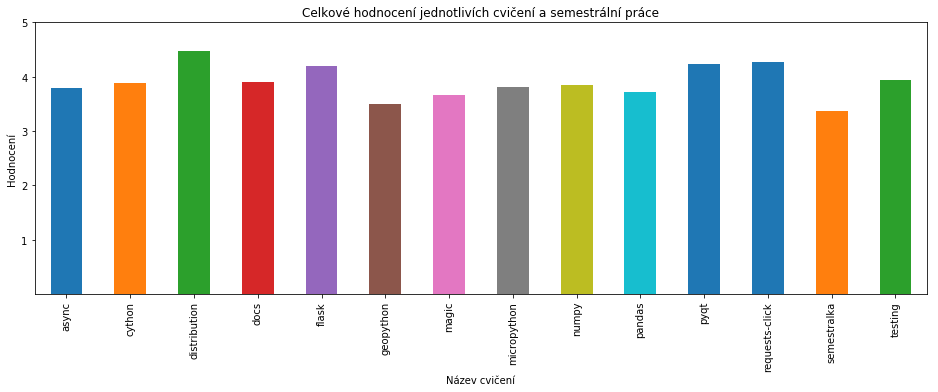

In [5]:
plot = lessons_group.plot(kind='bar', figsize=(16,5), yticks=np.arange(1, 6, step=1))
plot.set_ylabel("Hodnocení")
plot.set_xlabel("Název cvičení")
plot.set_title("Celkové hodnocení jednotlivích cvičení a semestrální práce")
plot

## Hodnocení jednotlivých cvičení a semestrální práce rozdělené dle hodnotících kategorií:
* 'like': 'How did you like the lesson? (Jak se ti lekce líbila?)',
* 'topic': 'How relevant was the topic? (Jak přínosné bylo téma?)',
* 'learn': 'How much did you learn? (Kolik nového ses naučil/a?)',

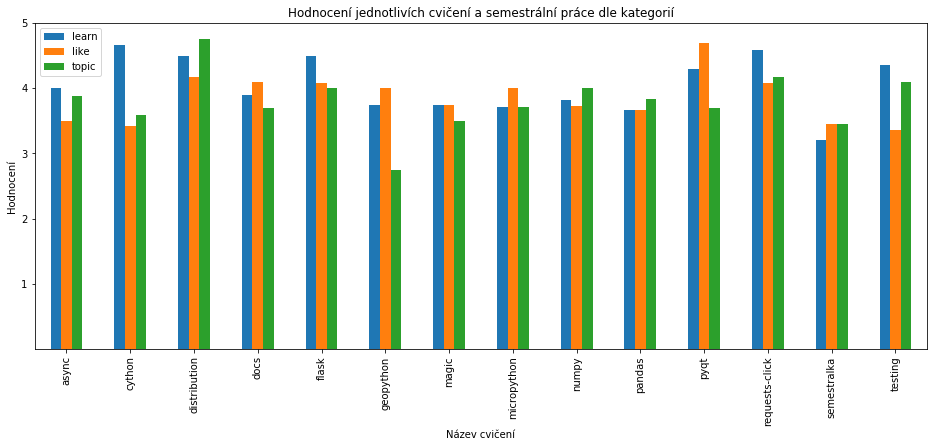

In [6]:
lessons_group_category = lessons.groupby([lessons.lesson, lessons.category]).answer_num.mean()

lessons_group_category = pd.DataFrame(lessons_group_category, index = lessons_group_category.index)
lessons_group_category = lessons_group_category.reset_index(level=['category'])
lessons_group_category = lessons_group_category[['category', 'answer_num']]
lessons_group_category

lessons_group_category_learn = lessons_group_category[lessons_group_category['category'] == 'learn']
lessons_group_category_learn = lessons_group_category_learn.loc[:, ['answer_num']]
lessons_group_category_learn.columns = ['learn']
lessons_group_category_learn

lessons_group_category_like = lessons_group_category[lessons_group_category['category'] == 'like']
lessons_group_category_like = lessons_group_category_like.loc[:, ['answer_num']]
lessons_group_category_like.columns = ['like']
lessons_group_category_like

lessons_group_category_topic = lessons_group_category[lessons_group_category['category'] == 'topic']
lessons_group_category_topic = lessons_group_category_topic.loc[:, ['answer_num']]
lessons_group_category_topic.columns = ['topic']
lessons_group_category_topic

lessons_to_plot = lessons_group_category_learn.merge(lessons_group_category_like, left_on='lesson', right_on='lesson', how='outer')
lessons_to_plot = lessons_to_plot.merge(lessons_group_category_topic, left_on='lesson', right_on='lesson', how='outer')
lessons_to_plot.sort_index(inplace=True)
lessons_to_plot

plot2 = lessons_to_plot.plot(kind='bar', figsize=(16,6), yticks=np.arange(1, 6, step=1))
plot2.set_ylabel("Hodnocení")
plot2.set_xlabel("Název cvičení")
plot2.set_title("Hodnocení jednotlivích cvičení a semestrální práce dle kategorií")
plot2

## Hodnocení předmětu v závislosti na získané známce studenta

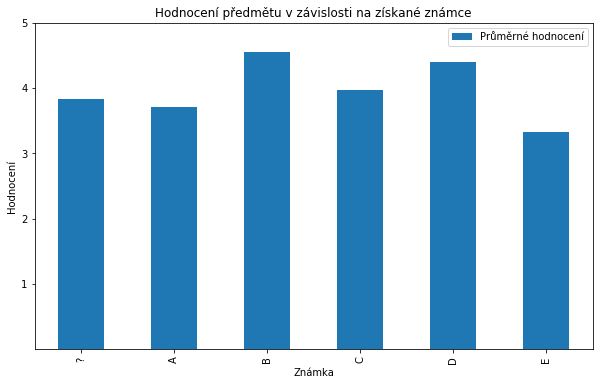

In [84]:
df['answer_num'] = df.answer.apply(conv_dict.get)
df.sort_values(['user_hash'])
rank_by_user = df.groupby(df.user_hash).answer_num.mean()
rank_by_user = pd.DataFrame(rank_by_user, index = rank_by_user.index)
user_mark = df[df['category'] == 'mark'][['user_hash','answer']]
rank_by_user = rank_by_user.merge(user_mark, left_on='user_hash', right_on='user_hash', how='outer')
rank_by_user_and_mark = rank_by_user.groupby(rank_by_user.answer).answer_num.mean()
rank_by_user_and_mark = pd.DataFrame(rank_by_user_and_mark, index = rank_by_user_and_mark.index)
rank_by_user_and_mark.columns = ['Průměrné hodnocení']

plot3 = rank_by_user_and_mark.plot(kind='bar', figsize=(10,6), yticks=np.arange(1, 6, step=1))
plot3.set_ylabel("Hodnocení")
plot3.set_xlabel("Známka")
plot3.set_title("Hodnocení předmětu v závislosti na získané známce")
plot3

### Zprávy všech studentů
###  Chceš nám něco vzkázat?

In [11]:
df[(df['answer'].str.len() > 1) & (df['category'] == 'message')][['user_hash', 'category', 'answer']]

,user_hash,category,answer
516,616b35b,message,Jako studenta znalostního inženýrství mě Pytho...
523,cae1229,message,"MI-PYT je paradny predmet, mozeme len dufat, z..."
533,be20576,message,Mluvit dostatečně nahlas při cvičeních.
535,46846bd,message,Ne.
549,d7b9214,message,"Předmět je parádně udělán, i pro člověka, kter..."


### Je dobrý nápad příští rok změnit formu výuky na přednášky/prosemináře přednáškové místnosti + konzultační hodiny (místo cvičení)?

In [12]:
df[(df['answer'].str.len() > 1) & (df['category'] == 'future')][['user_hash', 'category', 'answer']]

,user_hash,category,answer
504,d7b9214,future,"Výuku bych na přednášky neměnil ,protože tam b..."
510,1f8c534,future,"ne, ale něco by to chtělo udělat s časovou nár..."
522,be20576,future,"Ne, na cvičeních bylo nejlepší právě praktické..."
532,538a526,future,"podľa môjho názoru áno - v tom zmysle, že pros..."
536,46846bd,future,Pro většinu témat by to nejspíš šlo. Nevšiml j...
538,201ecf8,future,"Dost možná si myslím, že by to smysl mělo, pro..."
544,0060ce7,future,"Jednoznacne ne, soucasna forma ""interaktivnich..."
545,cae1229,future,"asi aj ano, cvika boli super, ale vacsina bol..."


### Jaká témata ti v kurzu chyběla?

In [13]:
df[(df['answer'].str.len() > 1) & (df['category'] == 'missing')][['user_hash', 'category', 'answer']]

,user_hash,category,answer
505,0060ce7,missing,SQL knihovny - Django ORM ci SQL alchemy.\nMoz...
506,cae1229,missing,nieco trendy ako tensorflow
507,d7b9214,missing,"Snad ani mě žádné, které by bylo dost obecné n..."
514,46846bd,missing,Žádné. Volba témat byla OK.
530,538a526,missing,"možno by bolo zaujímavé zahrnúť pygame/pyglet,..."
534,201ecf8,missing,"Říkal jsem si, jestli by nebylo vhodné téma tý..."
